In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

# prepare the data
data = pd.read_stata(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\data\original.dta")
df_action = pd.read_csv(r"data_noshuffle\df_action_lastversion.csv")

In [6]:
#train_ids = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\q_learning_discrete_state\data\train_id.csv")
test_ids = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\q_learning_discrete_state\data\test_id.csv")

In [12]:
data_test = data[data.hosp_id.isin(test_ids.hosp_id.tolist())]

In [13]:
df_action.columns

Index(['Unnamed: 0', 'hosp_id', 'action', 'ai_action', 'norepi_equiv', 'fluid',
       'intm1_action', 'intm2_action', 'intm3_action', 'vaso1_action',
       'vaso2_action', 'vaso3_action', 'vaso', 'iv', 'vaso_ai', 'vaso_intm1',
       'vaso_intm2', 'vaso_intm3', 'vaso_vaso1', 'vaso_vaso2', 'vaso_vaso3',
       'vaso_clin', 'iv_ai', 'iv_intm1', 'iv_intm2', 'iv_intm3', 'iv_vaso1',
       'iv_vaso2', 'iv_vaso3', 'iv_clin'],
      dtype='object')

In [37]:
import seaborn as sns
def NormalizeData(data):
    return (data - np.mean(data)) / np.std(data) 

feat_list = ['sirs_total','gluc','age','map','ast','bili','ph','gender','alt','hgb','base_excess',\
              'weight','sofa_total','wbc', 'gcs','inr','mechvent','rr','cl','sbp','pao2','na','hr','elix',\
              'lactate','pf_ratio','creat','paco2','temp','k','shock_index','o2_sat','bun','plt','fio2',\
              'alb','dbp','bicarb']

In [38]:
df2 = df1[feat_list]

In [41]:
df2

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,temp,k,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb
3453,2.0,167.0,69.0,71.666667,24.0,0.8,7.22,1.0,23.0,9.2,...,35.700000,4.1,1.009709,95.0,31.0,177.0,36.0,2.5,56.0,21.0
3454,3.0,155.0,69.0,79.000000,38.0,0.6,7.22,1.0,27.0,9.2,...,36.300000,3.8,0.702290,96.0,102.0,327.0,40.0,1.9,53.0,14.0
3455,2.0,155.0,69.0,84.000000,24.0,0.5,7.28,1.0,25.0,9.2,...,36.600000,3.8,0.643939,95.0,102.0,327.0,40.0,2.2,60.0,14.0
3456,2.0,168.0,69.0,73.333333,50.0,0.9,7.33,1.0,27.0,8.7,...,36.800000,2.8,0.657895,97.0,82.0,320.0,50.0,1.7,53.0,17.0
3457,2.0,168.0,69.0,80.000000,34.0,0.6,7.34,1.0,25.0,8.7,...,36.700000,2.8,0.611940,98.0,82.0,320.0,36.0,1.7,53.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304199,1.0,98.0,55.0,71.000000,21.0,0.6,7.25,1.0,22.0,9.8,...,36.333333,5.2,0.907216,100.0,89.0,169.0,21.0,1.4,58.0,14.0
304200,1.0,98.0,55.0,73.666667,21.0,0.6,7.27,1.0,22.0,9.8,...,36.500000,5.2,0.847619,100.0,89.0,169.0,21.0,1.4,58.0,14.0
304201,2.0,94.0,55.0,80.333333,21.0,0.6,7.32,1.0,22.0,10.5,...,36.300000,4.9,0.850467,98.0,59.0,159.0,35.0,1.4,67.0,17.4
304202,2.0,94.0,55.0,76.666667,21.0,0.6,7.29,1.0,22.0,10.5,...,36.444444,4.9,0.933962,98.0,59.0,159.0,21.0,1.4,62.0,17.4


In [39]:
df2_norm=NormalizeData(df2)

In [40]:
df2_norm

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,temp,k,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb
3453,-0.522542,-0.030854,-0.074228,-0.790825,-0.552230,-0.116324,-1.083031,1.507292,-0.283303,0.009800,...,-0.619948,-0.010297,1.291737,-0.226003,-1.222427,-0.694589,-0.701615,0.850647,-0.481871,1.229572
3454,0.630760,-0.197441,-0.074228,-0.372309,-0.236722,-0.398162,-1.083031,1.507292,-0.148903,0.009800,...,0.086330,-0.407622,-0.418896,0.006932,0.868211,0.850446,-0.392872,-0.499529,-0.636241,-0.463326
3455,-0.522542,-0.197441,-0.074228,-0.086957,-0.552230,-0.539081,-0.290077,1.507292,-0.216103,0.009800,...,0.439469,-0.407622,-0.743589,-0.226003,0.868211,0.850446,-0.392872,0.175559,-0.276045,-0.463326
3456,-0.522542,-0.016971,-0.074228,-0.695708,0.033714,0.024595,0.370719,1.507292,-0.148903,-0.316590,...,0.674894,-1.732037,-0.665934,0.239867,0.279299,0.778344,0.378986,-0.949588,-0.636241,0.262201
3457,-0.522542,-0.016971,-0.074228,-0.315239,-0.326867,-0.398162,0.502878,1.507292,-0.216103,-0.316590,...,0.557181,-1.732037,-0.921648,0.472802,0.279299,0.778344,-0.701615,-0.949588,-0.636241,0.262201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304199,-1.675843,-0.988732,-1.448764,-0.828872,-0.619839,-0.398162,-0.686554,1.507292,-0.316903,0.401469,...,0.125567,1.446560,0.721418,0.938671,0.485418,-0.776991,-1.859402,-1.624676,-0.378958,-0.463326
304200,-1.675843,-0.988732,-1.448764,-0.676685,-0.619839,-0.398162,-0.422236,1.507292,-0.316903,0.401469,...,0.321756,1.446560,0.389788,0.938671,0.485418,-0.776991,-1.859402,-1.624676,-0.378958,-0.463326
304201,-0.522542,-1.044261,-1.448764,-0.296215,-0.619839,-0.398162,0.238560,1.507292,-0.316903,0.858415,...,0.086330,1.049236,0.405637,0.472802,-0.397950,-0.879993,-0.778801,-1.624676,0.084152,0.358938
304202,-0.522542,-1.044261,-1.448764,-0.505473,-0.619839,-0.398162,-0.157918,1.507292,-0.316903,0.858415,...,0.256360,1.049236,0.870245,0.472802,-0.397950,-0.879993,-1.859402,-1.624676,-0.173132,0.358938


In [8]:
data_test['vaso_clin'] = df_action.vaso_clin.tolist()
data_test['vaso_intm2'] = df_action.vaso_intm2.tolist()
data_test['vaso_vaso3'] = df_action.vaso_vaso3.tolist()

C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [9]:
data_test.loc[data_test.vaso_clin>0,'vaso_clin']=1
data_test.loc[data_test.vaso_intm2>0,'vaso_intm2']=1
data_test.loc[data_test.vaso_vaso3>0,'vaso_vaso3']=1

C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
feat_list = ['sirs_total','gluc','age','map','ast','bili','ph','gender','alt','hgb','base_excess',\
              'weight','sofa_total','wbc', 'gcs','inr','mechvent','rr','cl','sbp','pao2','na','hr','elix',\
              'lactate','pf_ratio','creat','paco2','temp','k','shock_index','o2_sat','bun','plt','fio2',\
              'alb','dbp','bicarb']

In [26]:
data_test

,hosp_id,interval,empi_id,sofa_total,sirs_total,age,alb,alt,ast,base_excess,...,temp,wbc,weight,fluid,norepi_equiv,action,dead_90,vaso_clin,vaso_intm2,vaso_vaso3
44,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,16.0,4E0CwIpoku8yxQK6e06AsQ==,4.0,3.0,50.0,2.5,22.0,26.0,-0.661223,...,38.333333,1.9,82.0,200.0,0.00,6.0,0.0,0,0,0
45,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,17.0,4E0CwIpoku8yxQK6e06AsQ==,2.0,1.0,50.0,2.7,25.0,30.0,-0.661223,...,37.600000,10.5,82.0,250.0,0.00,6.0,0.0,0,0,0
46,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,18.0,4E0CwIpoku8yxQK6e06AsQ==,2.0,1.0,50.0,2.9,19.0,20.0,2.622750,...,37.000000,10.1,82.0,375.0,0.00,11.0,0.0,0,0,0
59,++sVZMdnPthQ8j9GDO2lzn9JsycyZ/tmjpMgqg9zFVM=,9.0,6RNoPRCXgYLxKQgao3UnEQ==,5.0,2.0,79.0,2.5,13.0,15.0,1.993084,...,37.300000,17.5,61.0,2400.0,0.04,22.0,0.0,1,0,0
60,++sVZMdnPthQ8j9GDO2lzn9JsycyZ/tmjpMgqg9zFVM=,10.0,6RNoPRCXgYLxKQgao3UnEQ==,7.0,3.0,79.0,2.5,13.0,15.0,3.035393,...,38.222222,17.5,61.0,2300.0,0.16,23.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309835,zzyOyK/jdML4Z0dRBUnWiFSr+fXITJMpn46RpEQblE8=,14.0,CA7dMXafVvCtHqfD2zISmg==,4.0,1.0,78.0,2.7,22.0,26.0,13.247165,...,36.700000,7.6,66.5,1000.0,0.00,21.0,1.0,0,0,0
309836,zzyOyK/jdML4Z0dRBUnWiFSr+fXITJMpn46RpEQblE8=,15.0,CA7dMXafVvCtHqfD2zISmg==,12.0,0.0,78.0,2.4,40.0,83.0,12.723048,...,36.944444,7.6,66.5,0.0,0.15,3.0,1.0,1,0,0
309837,zzyOyK/jdML4Z0dRBUnWiFSr+fXITJMpn46RpEQblE8=,16.0,CA7dMXafVvCtHqfD2zISmg==,8.0,1.0,78.0,2.3,21.0,17.0,12.723048,...,37.111111,10.3,66.5,0.0,0.20,4.0,1.0,1,0,0
309838,zzyOyK/jdML4Z0dRBUnWiFSr+fXITJMpn46RpEQblE8=,17.0,CA7dMXafVvCtHqfD2zISmg==,8.0,0.0,78.0,2.3,21.0,17.0,10.498713,...,36.611111,10.3,66.5,0.0,0.20,4.0,1.0,1,0,0


In [11]:
X = data_test[feat_list]
y1 = data_test.vaso_clin
y2 = data_test.vaso_intm2
y3 = data_test.vaso_vaso3

In [14]:
from sklearn.ensemble._forest import _generate_unsampled_indices
def oob_classifier_accuracy1(clf1, X_train1, y_train1):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train1.values
    y = y_train1.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf1.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf1.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [15]:
from sklearn.ensemble._forest import _generate_unsampled_indices
def oob_classifier_accuracy(clf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [16]:
from sklearn.ensemble import RandomForestClassifier


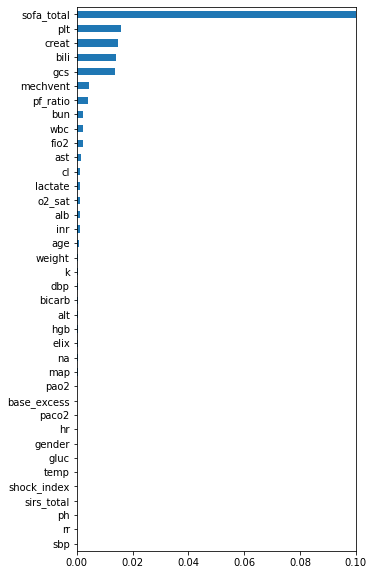

In [17]:
clf = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf.fit(X, y1)
result = permutation_importance(clf, X, y1, n_repeats=10, scoring = oob_classifier_accuracy,
                                random_state=42)
#sorted_idx = result.importances_mean.argsort()
feat_importances_sk = pd.Series(result.importances_mean, index=X.columns)
feat_importances_sk = feat_importances_sk.sort_values(ascending=True)
feat_importances_sk.plot(kind='barh', figsize=(5,10))
plt.xlim(0,0.1)
plt.show()

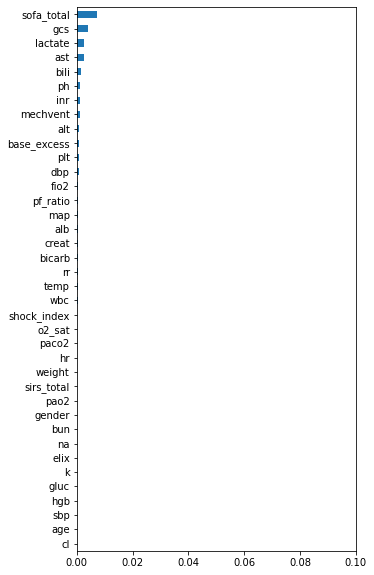

In [18]:
clf_intm2 = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf_intm2.fit(X, y2)
result = permutation_importance(clf_intm2, X, y2, n_repeats=10, scoring = oob_classifier_accuracy,
                                random_state=42)
#sorted_idx = result.importances_mean.argsort()
feat_importances_sk1 = pd.Series(result.importances_mean, index=X.columns)
feat_importances_sk1 = feat_importances_sk1.sort_values(ascending=True)
feat_importances_sk1.plot(kind='barh', figsize=(5,10))
plt.xlim(0,0.1)
plt.show()

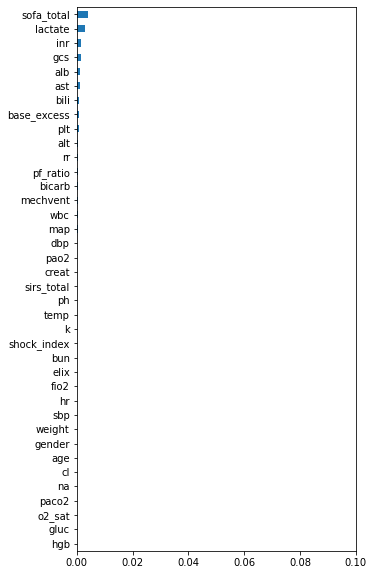

In [19]:
clf_vaso3 = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf_vaso3.fit(X, y3)
result = permutation_importance(clf_vaso3, X, y3, n_repeats=10, scoring = oob_classifier_accuracy,
                                random_state=42)
#sorted_idx = result.importances_mean.argsort()
feat_importances_sk2 = pd.Series(result.importances_mean, index=X.columns)
feat_importances_sk2 = feat_importances_sk2.sort_values(ascending=True)
feat_importances_sk2.plot(kind='barh', figsize=(5,10))
plt.xlim(0,0.1)
plt.show()

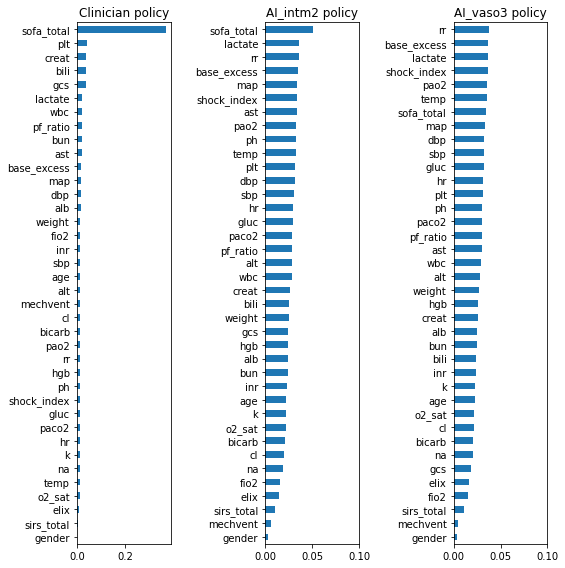

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8))
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances1 = pd.Series(clf_intm2.feature_importances_, index=X.columns)
feat_importances1 = feat_importances1.sort_values(ascending=True)
feat_importances2 = pd.Series(clf_vaso3.feature_importances_, index=X.columns)
feat_importances2 = feat_importances2.sort_values(ascending=True)
feat_importances.plot(ax=ax1, kind='barh')
feat_importances1.plot(ax=ax2, kind='barh')
feat_importances2.plot(ax=ax3, kind='barh')
ax1.set_title("Clinician policy")
#ax1.set_xlim([0, 0.1])
ax2.set_title("AI_intm2 policy")
ax2.set_xlim([0, 0.1])
ax3.set_title("AI_vaso3 policy")
ax3.set_xlim([0, 0.1])
fig.tight_layout()
plt.show()